# The Sparks Foundation - Data Science & Business Analytics Internship

## GRIP @ The Sparks Foundation

### By : Dibbendu Sarkar 

## TASK 1 - Prediction using supervised Machine Learning

In this task it is require to build the model to predict the score if the student studies 9.5 hrs/day.


### Steps :

<ul>
<li>Import libraries</li>
<li>Read the data</li>
<li>Explore the data</li>
<li>visualize the data</li>
<li>OLS model using statsmodels library</li>
<li>Make the prediction</li>
<li>Evaluate the model</li>
<li>predict the score if the student studies 9.5 hrs/day</li>    
</ul>

## Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Read the data 


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Check for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# corrolation 
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


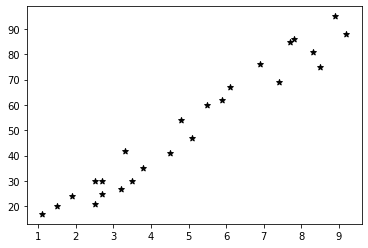

In [8]:
plt.scatter(x=data['Hours'],y=data['Scores'],color = 'black',marker='*')

In [9]:
y=data['Scores']
X=data['Hours']

In [10]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

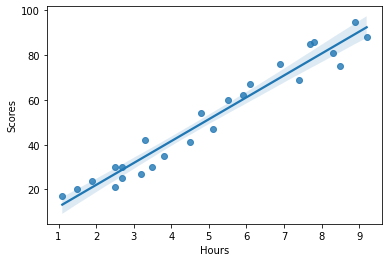

In [11]:
# visalize the model 
sns.regplot(x="Hours", y="Scores", data=data)

## linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Prediction

In [13]:
# predict the model
y_pred = model.predict(X_test)

## Evaluate the model 

In [14]:
print('the train data accuracy =',model.score(X_train,y_train))
print('the test data accuracy  =',model.score(X_test,y_test))

the train data accuracy = 0.9491209376364416
the test data accuracy  = 0.9678055545167994


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9678055545167994

## OLS Regression 

In [16]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           9.13e-17
Time:                        12:12:32   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## the predicted score if the student studies 9.5 hrs/day

In [17]:
num_of_houres = 9.5
score = model.predict([[num_of_houres]])
print('If the student study {} the score will be {}'.format(num_of_houres,score))

If the student study 9.5 the score will be [[94.80663482]]
